In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [3]:
# Model structure
model = tf.keras.models.Sequential()

In [4]:
# Input layer
model.add(tf.keras.layers.Flatten())

# Hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Output layer
# We use softmax for the output layer because we want to classify the input in 10 categories {0, 1, .., 9}
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8685 - loss: 0.4636
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9643 - loss: 0.1114
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9777 - loss: 0.0711


In [6]:
val_loss, val_acc = model.evaluate(x_train, y_train)
print(val_loss, val_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9845 - loss: 0.0518
0.05093211680650711 0.9841166734695435


In [34]:
model.save('digit_model.keras')

In [35]:
my_model = tf.keras.models.load_model("digit_model.keras", custom_objects={'softmax_v2' : tf.keras.activations.softmax})
predictions = my_model.predict(x_test)

c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [40]:
print(predictions)

[[1.52741517e-08 7.66941298e-07 1.30029241e-06 ... 9.99724209e-01
  1.90401784e-06 4.21521618e-05]
 [1.84922460e-08 1.08276890e-03 9.98901486e-01 ... 1.09620466e-07
  1.37653035e-06 8.78531969e-11]
 [2.34439781e-07 9.99893546e-01 1.65532117e-06 ... 2.46830259e-05
  1.04853671e-05 2.24871314e-06]
 ...
 [2.68678413e-09 8.58179249e-07 4.26363345e-09 ... 9.60102534e-06
  2.33999785e-07 6.28200360e-04]
 [5.23596611e-07 3.17939417e-08 4.14582608e-08 ... 4.44162470e-06
  4.89248778e-04 6.21086258e-08]
 [8.16274053e-07 1.05149161e-06 1.17920501e-06 ... 4.18452339e-09
  2.75674363e-08 1.74198256e-08]]


In [69]:
import numpy as np
x = 40
y = x + 12

# this will print the index of the highest probability in predictions[x]
# the value of the index should be the digit in the picture
print(np.argmax(predictions[x]))

1


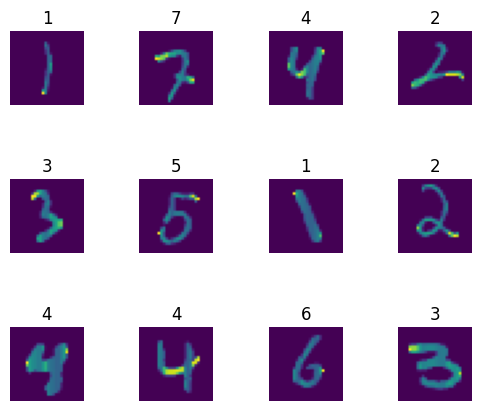

In [ ]:
import matplotlib.pyplot as plt

# printing some pictures of the x_test and it's predictions as title
for i in range(x, y):
    plt.subplot(3, 4, i-x+1)
    plt.subplots_adjust(hspace=1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(np.argmax(predictions[i]))
plt.show()